In [132]:
%matplotlib notebook

In [133]:
from numpy import sin, cos, pi
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def RotateX(theta):
    return np.array([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])

def RotateY(theta):
    return np.array([[cos(theta), 0, sin(theta)],[0,1,0],[-sin(theta),0,cos(theta)]])

def fk(alpha, theta, phi, l1, l2, hip_offset):
    px = -l1 * sin(theta) - l2 * sin(theta + phi)
    py = hip_offset
    pz = -l1 * cos(theta) - l2 * cos(theta + phi)
    tilted_frame_coordinates = np.array([px, py, pz])
    cartesian_coordinates = RotateX(alpha) @ tilted_frame_coordinates
    return cartesian_coordinates


def jac(alpha, theta, phi, l1, l2, hip_offset):
    px = -l1 * sin(theta) - l2 * sin(theta + phi)
    py = hip_offset
    pz = -l1 * cos(theta) - l2 * cos(theta + phi)
    return array(
        [
            [0, pz, -l2 * cos(theta + phi)],
            [
                -py * sin(alpha) - pz * cos(alpha),
                sin(alpha) * px,
                -l2 * sin(alpha) * sin(theta + phi),
            ],
            [
                py * cos(alpha) - pz * sin(alpha),
                -px * cos(alpha),
                l2 * cos(alpha) * sin(theta + phi),
            ],
        ]
    )


def add_bounding_box(ax, max_range=0.2):
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()# + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()# + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()# + 0.5*(Z.max()+Z.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')
    
def LegCoordinates(alpha, theta, phi, l1, l2, hip_offset):
    p0 = array([0,0,0])
    p1 = RotateX(alpha) @ (0, hip_offset, 0)
    thigh_n = RotateX(alpha) @ RotateY(theta) @ (0, 0, -l1)
    p2 = p1 + thigh_n
    shank_n = RotateX(alpha)@RotateY(phi+theta) @ (0, 0, -l2)
    p3 = p2 + shank_n
    return list(zip(p0,p1,p2,p3))


def TestFK():
    alpha=0; theta=pi/4; phi=-pi/2; l1=1; l2=1; hip_offset=0.01
    
    for i in range(10):
        alpha = np.random.randn()
        theta = np.random.randn()
        phi = np.random.randn()
        l1 = np.random.randn()
        l2 = np.random.randn()
        fk0 = fk(alpha, theta, phi, l1, l2, hip_offset)
        fk1 = list(zip(*LegCoordinates(alpha, theta, phi, l1, l2, hip_offset)))[-1]
        print(fk0, fk1)
        assert((np.linalg.norm(fk0 - fk1) < 1e-6).all())
    
    
def Velocity(joint_vel, jac):
    cart_vel = jac @ joint_vel
    return list(zip((0,0,0),cart_vel))

In [134]:
fk(alpha=pi/4,theta=0,phi=0,l1=1,l2=1,hip_offset=0.5)

array([ 0.        ,  1.76776695, -1.06066017])

In [135]:
j = jac(alpha=0, theta=0, phi=0, l1=1, l2=1, hip_offset=0)
print(j)

[[ 0. -2. -1.]
 [ 2. -0. -0.]
 [ 0.  0.  0.]]


In [136]:
"""VEL"""
print(j @ array([1, 0, 0]))
print(j @ array([0, 1, 0]))
print(j @ array([0, 0, 1]))

[0. 2. 0.]
[-2.  0.  0.]
[-1.  0.  0.]


In [137]:
"""TORQUE"""
print(j.T @ array([1, 0, 0]))
print(j.T @ array([0, 1, 0]))
print(j.T @ array([0, 0, 1]))

[ 0. -2. -1.]
[2. 0. 0.]
[0. 0. 0.]


In [138]:
TestFK()

[ 1.51856995  2.12477145 -0.21429655] (1.5185699470145564, 2.124771448056007, -0.2142965546565634)
[-0.29473071 -0.12610893 -0.34636229] (-0.29473071373696236, -0.1261089303603999, -0.34636228923855295)
[-0.01757779  0.54644609 -0.77379267] (-0.017577794839939265, 0.5464460881588451, -0.7737926731370144)
[ 0.31373169 -0.97092817 -0.89308292] (0.31373168963910203, -0.9709281716221387, -0.8930829211323639)
[-0.34172455  1.25703113  0.06000906] (-0.34172454724690776, 1.257031126537887, 0.06000906334262155)
[ 0.11389052  0.41727087 -0.3208332 ] (0.11389052252676979, 0.41727086719098033, -0.3208332041291505)
[ 0.25616816  0.02578402 -0.06645841] (0.2561681592379191, 0.025784017120707776, -0.06645841295906604)
[-0.95420545 -0.76775715 -1.77617758] (-0.9542054534295836, -0.7677571491229711, -1.776177583750383)
[-1.48517652 -0.83794475 -1.75695772] (-1.4851765158753345, -0.8379447520351513, -1.7569577198653326)
[ 1.27297615  0.07466706 -0.15311772] (1.2729761464386948, 0.07466705539793365, -0.

<IPython.core.display.Javascript object>


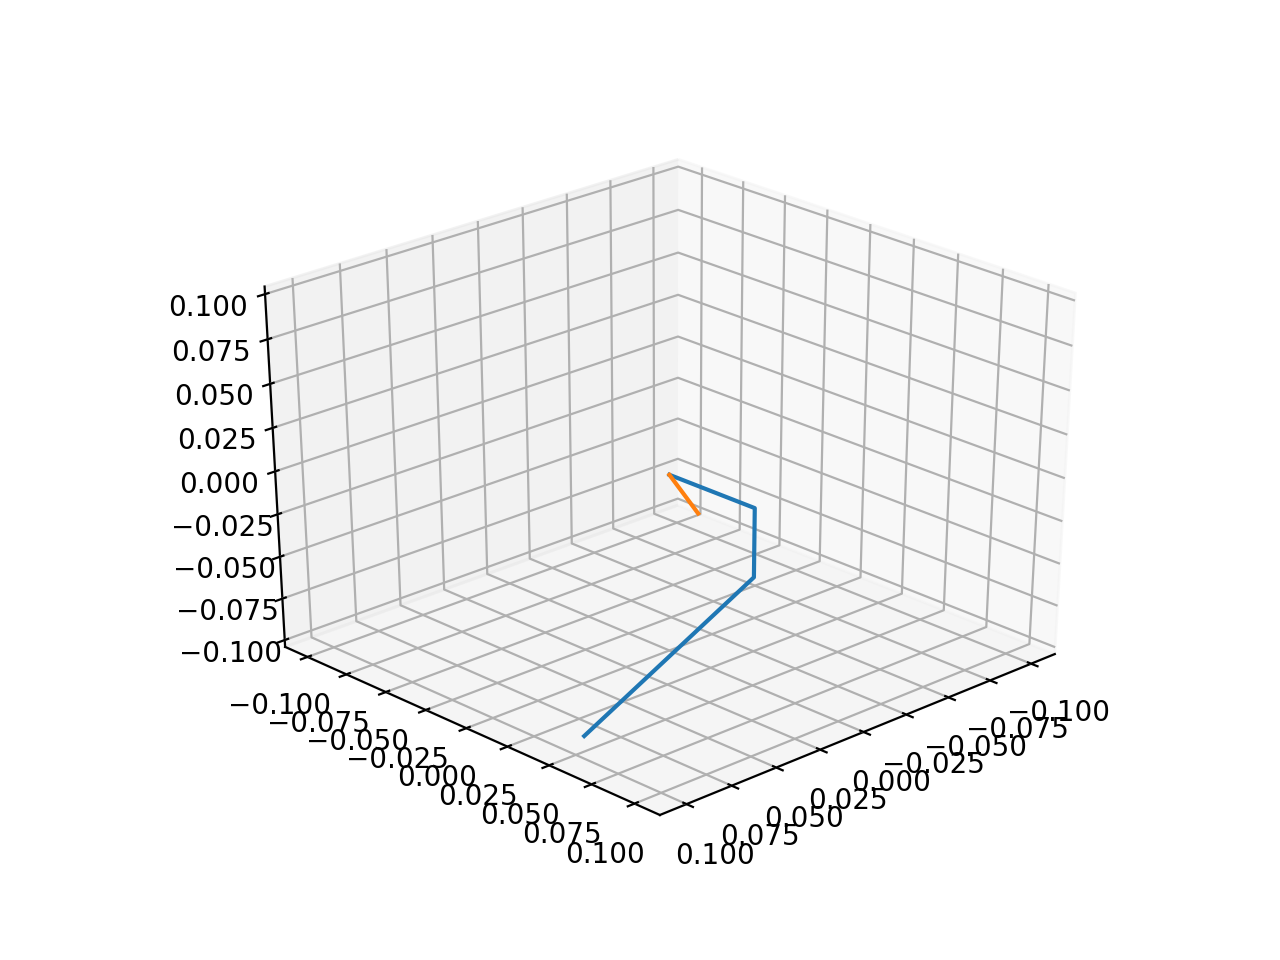

(0, 0, 0.3)
[-0.0165      0.         -0.02857884]


In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alpha=0
theta=0
phi=-pi/3
l1=0.04
l2=0.11
hip_offset=0.05

xs, ys, zs = LegCoordinates(alpha, theta, phi, l1, l2, hip_offset)
ax.plot(xs, ys, zs)

joint_vel = (0,0,0.3)
print(joint_vel)
# ax.plot(*list(zip((0,0,0),joint_vel)))

j = jac(alpha, theta, phi, l1, l2, hip_offset)
print(j@joint_vel)
xs, ys, zs = Velocity(joint_vel, j)
ax.plot(xs, ys, zs)

add_bounding_box(ax)